In [62]:
import pandas as pd
import datetime
import time
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('time_series_covid19_confirmed_US.csv',sep=",")

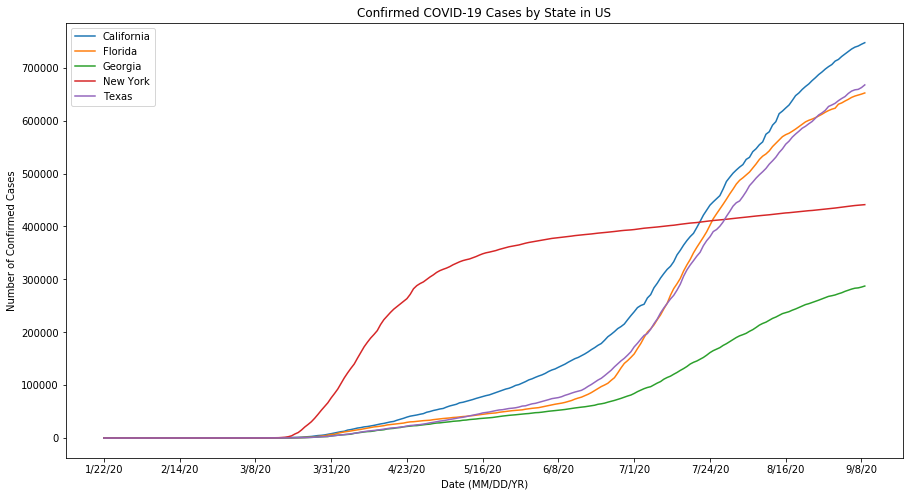

In [64]:
#unique_states = df.Province_State.unique()

sample_states = ['California', 'Texas', 'Florida', 'New York', 'Georgia']
sample_states.sort()

def get_index_from_data():
    
    first_day = datetime.datetime(2020,1,22)
    
    wow = [int(i) for i in list(df)[-1].split('/')]
    wow[-1]=2020
    end_year = wow[-1]
    end_month = wow[0]
    end_days = wow[1]
    
    end_day = datetime.datetime(end_year,end_month,end_days)
    
    number_of_days = (end_day-first_day).days
    return number_of_days
    
    
end_index = get_index_from_data()

dates = list(df)[11:]

x_values = dates[0:end_index+1]


for state in sample_states:
    state_df = df.query(f"Province_State == '{state}'").sum()
    y_values = [(state_df[col]) for col in x_values]
    plt.plot(x_values,y_values,label = state)

    

#getting bigger plotting screen
plt.gcf().set_size_inches(15, 8)


plt.title("Confirmed COVID-19 Cases by State in US")
skip = max(len(x_values)//10, 1)
plt.xticks(x_values[::skip])
plt.xlabel("Date (MM/DD/YR)")
plt.ylabel("Number of Confirmed Cases")
plt.legend()
plt.show()